In [13]:
from common import *

# Monitor Batch Experiment

In [14]:
batch_progress(settings.output_path('validation/mc/6min'), monitor_address=settings.monitor_server_address())

Total remaining time: 0 - Finish time: 2019-09-22 13:58:05.164705


,name,status,duration,runtime,start,end,log-length,warnings,errors
0,./l10-a2048-c300/i9,finished,1 hours,1:02 hours,04:26 (2019-09-16),05:29 (2019-09-16),1555,0,0
1,./l10-a2048-c300/i8,finished,1 hours,1:02 hours,03:24 (2019-09-16),04:26 (2019-09-16),1469,0,0
2,./l10-a2048-c300/i7,finished,1 hours,1:02 hours,02:22 (2019-09-16),03:24 (2019-09-16),1520,0,0
3,./l10-a2048-c300/i6,finished,1 hours,1:02 hours,01:19 (2019-09-16),02:21 (2019-09-16),1482,0,0
4,./l10-a2048-c300/i5,finished,1 hours,1:02 hours,00:17 (2019-09-16),01:19 (2019-09-16),1513,0,0
5,./l10-a2048-c300/i4,finished,1 hours,1:02 hours,23:15 (2019-09-15),00:17 (2019-09-16),1522,0,0
6,./l10-a2048-c300/i3,finished,1 hours,1:02 hours,22:12 (2019-09-15),23:15 (2019-09-15),1523,0,0
7,./l10-a2048-c300/i2,finished,1 hours,1:02 hours,21:10 (2019-09-15),22:12 (2019-09-15),1544,0,0
8,./l10-a2048-c300/i19,finished,1 hours,1:02 hours,20:08 (2019-09-15),21:10 (2019-09-15),1527,0,0
9,./l10-a2048-c300/i18,finished,1 hours,1:02 hours,19:05 (2019-09-15),20:08 (2019-09-15),1497,0,0


In [5]:
import nesteddict
store = nesteddict.NestedDictFS(settings.output_path('mem-trace', '6min'), mode='c', store_engine='pickle')
(4096, 10, 10) in store

False

# Creating Tests

In [6]:
from elasticbench.exp.mem_trace import generate_multiple_mem_trace
generate_multiple_mem_trace('6min', [512, 1024, 2048, 4096], [15, 10, 5], 20, min_amplitude=512)

In [3]:
from elasticbench.exp.mem_trace import generate_multiple_mem_trace
generate_multiple_mem_trace('6min', [2048], [300, 150, 100], 20, min_amplitude=512)

In [ ]:
from elasticbench.exp.mem_trace import iterate_over_stored_mem_trace

for (m, c, i), mem_func in iterate_over_stored_mem_trace('6min'):
    plt.figure(figsize=(5,2))
    mem_func.plot()
    plt.title(f'{m}-{c}-{i}')
    plt.show()

## Validation

In [8]:
mc_exp.make_all_validation('6min', parameters_set={(2048, 100), (2048, 150), (2048, 300)})

In [7]:
mcd_exp.make_all_validation('6min', cmd_get_percent=0.9)

## Decrease Increase

In [14]:
mc_exp.decrease_increase_test(load=10)

In [22]:
mcd_exp.decrease_increase_test(load=20, win_size='100k')

## Oscillation Test

In [23]:
mc_exp.make_all_drop_test(load=10, repeat=3, exp_type='drop-init')

(3, <IPython.core.display.HTML object>)

In [24]:
mcd_exp.make_all_drop_test(load=20, win_size='100k', repeat=3, exp_type='drop-init')

In [2]:
mc_exp.make_all_drop_test(load=10, repeat=5, exp_type='drop')

In [2]:
mcd_exp.make_all_drop_test(load=20, win_size='100k', repeat=5, exp_type='drop', spare_mem=100, cmd_get_percent=0.9)

In [10]:
mcd_exp.make_all_drop_test(load=20, win_size='100k', repeat=5, exp_type='drop', spare_mem=100, cmd_get_percent=0.9, elastic=False,
                          base_step_time=(12, 'm'), drop_step_time=(12, 'm'))

## Step Test

In [ ]:
memory_consumer.step_test(4096, 1024, [(1, 'm')]*5, load=10)

In [ ]:
mcd_exp.step_test(4096, 1024, [(4, 'm'), (1, 'm')]*10, win_size='100k', load=10)

## Static

In [2]:
mcd_exp.static_test(load=20, memory_alloc=4096, duration=(10, 'm'), win_size='100k', cmd_get_percent=0.9, dynamic=True)

In [ ]:
t = mcd_exp.make_all_step_tests(win_size='100k', load=20)
len(t)

In [ ]:
iperf_exp.static_test(load=10, memory_alloc=4096, duration=(1, 'h'))

In [ ]:
psql_exp.static_test(load=128, memory_alloc=2048, duration=(1, 'h'))

In [ ]:
stress_exp.static_test(load=4, memory_alloc=4096, duration=(1, 'h'))

# PSQL

In [ ]:
d = ExpData(settings.get_output_path('static/psql-l4-m4096-1h'))
c = d.column_names
len(c)
print([cc for cc in c if cc.startswith('perf:')])

In [ ]:
d = ExpData(settings.get_output_path('static/psql-l128-m2048-1h'))
plot_funcs(d, psql_plots.tps,
           plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used, plots.mem_cache_and_buff,
          for_group='vm-1'
          )

In [ ]:
d = ExpData(settings.get_output_path('static/psql-l256-m8192-1h'))
plot_funcs(d, psql_plots.tps,
           plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used, plots.mem_cache_and_buff,
          for_group='vm-1'
          )

In [ ]:
d = ExpData(settings.get_output_path('static/psql-l256-m4096-1h'))
plot_funcs(d, psql_plots.tps,
           plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used, plots.mem_cache_and_buff,
          for_group='vm-1'
          )

In [ ]:
d = ExpData(settings.get_output_path('static/psql-l256-m4096-1h'))
plot_funcs(d, psql_plots.tps,
           plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used, plots.mem_cache_and_buff, plots.cpu_usage_time_resample,
          for_group='vm-1'
          )

In [ ]:
d = ExpData(settings.get_output_path('static/psql-l128-m4096-1h/backup/2019-07-14--15-52-33'))
plot_funcs(d, plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used, plots.mem_cache_and_buff,
           psql_plots.tps,
          for_group='vm-1'
          )

In [ ]:
print('avrora batik eclipse fop h2 jython luindex lusearch pmd sunflow tomcat tradebeans tradesoap xalan'.split())

# Memory Consumer

In [7]:
p = MultiExpAnalyzer(settings.output_path('drop/mc'), mc_plots, 'vm-1')

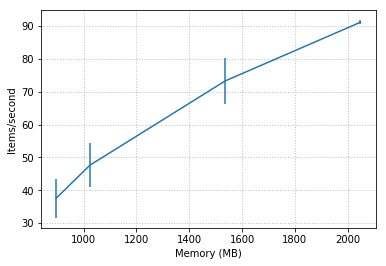

In [8]:
p.plot_memory_profile()

In [9]:
d = ExpData(settings.output_path('dec-inc/mc/l10-m896-3072'))
plot_funcs(d, plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used, plots.mem_swap_out,
           mc_plots.perf_hits, mc_plots.perf_throughput, mc_plots.memory,
           for_group='vm-1')

DatabaseError: Execution failed on sql 'select `sample_start`, `perf:hit-rate`, `source`, `sample_end` from data where `sample_start` != '' and `perf:hit-rate` != '' and `source` != '' and `sample_end` != '' order by `sample_start` asc': no such column: perf:hit-rate

In [ ]:
d = ExpData(settings.output_path('dec-inc/mc/l10-m896-3072'))
plot_funcs(d, plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used, plots.mem_swap_out,
           mc_plots.perf_hits, mc_plots.perf_throughput, mc_plots.memory,
           for_group='vm-1')

## Test Drop&Rise

In [ ]:
d = ExpData(settings.output_path('drop-init/mc/l10-b2048-d1024-x3'))
p = ExpAnalyzer(d, mc_plots, 'vm-1')
p.plot()

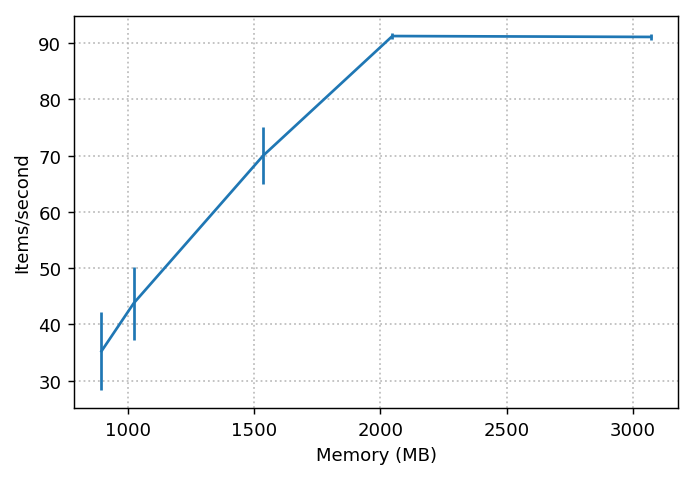

In [21]:
# p.plot()
init_plot()
# plt.figure(figsize=(5,3))
p.plot_memory_profile()

In [12]:
from cloudexp.results.pit_test import PitTest
d = ExpData(settings.get_output_path('drop/mc/l10-b2048-d1024-x20'))
p = PitTest(d, mc_plots.perf_hits, 'vm-1')

In [ ]:
plot_funcs(d, plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used, plots.mem_swap_out,
           mc_plots.perf_hits, mc_plots.perf_throughput, mc_plots.memory,
           for_group='vm-1')

In [ ]:
p.plot()

# Memcached Static

In [5]:
p = MultiExpAnalyzer('memcached-static/l20-g0.90', settings.output_path('drop/memcached-static/l20-g0.90'), mcd_plots, 'vm-1', window_sec=90, warmup_time=(8, 'm'))

In [ ]:
p['./l20-b3072-d1024-x5'].plot()

# Memcached

In [119]:
p = MultiExpAnalyzer('memcached/l20-g0.90', settings.output_path('drop/memcached/l20-g0.90'), mcd_plots, 'vm-1', window_sec=90, warmup_time=(8, 'm'))

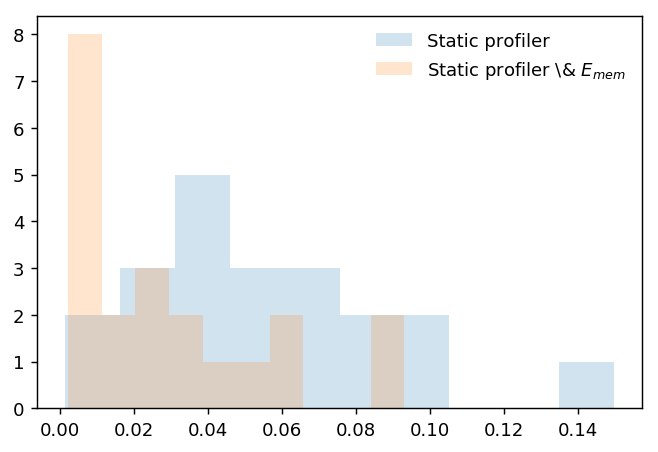

In [133]:
init_plot()
p.plot_perf_ratio()

In [ ]:
df = p.get_perf_ratio_data()
df.corr()

In [117]:
p = ExpAnalyzer('memcached/l20-g0.90', settings.output_path('drop/memcached/l20-g0.90/l20-b3584-d3072-x5'), mcd_plots, 'vm-1', window_sec=90)

In [ ]:
p.plot()

In [11]:
p.p.keys()

dict_keys(['./l20-b1024-d896-x5', './l20-b1536-d1024-x5', './l20-b1536-d896-x5', './l20-b2048-d1024-x5', './l20-b2048-d1536-x5', './l20-b2048-d896-x5', './l20-b2560-d1024-x5', './l20-b2560-d1536-x5', './l20-b2560-d2048-x5', './l20-b2560-d896-x5', './l20-b3072-d1024-x5', './l20-b3072-d1536-x5', './l20-b3072-d2048-x5', './l20-b3072-d2560-x5', './l20-b3072-d896-x5', './l20-b3584-d1024-x5', './l20-b3584-d1536-x5', './l20-b3584-d2048-x5', './l20-b3584-d2560-x5', './l20-b3584-d3072-x5', './l20-b3584-d896-x5'])

In [ ]:
p.p['./l20-b3584-d3072-x5'].plot()

In [ ]:
p = ExpAnalyzer('memcached', settings.output_path('static/memcached/l20-g0.90/l20-m4096-10m'), mcd_plots, 'vm-1')
p.plot()

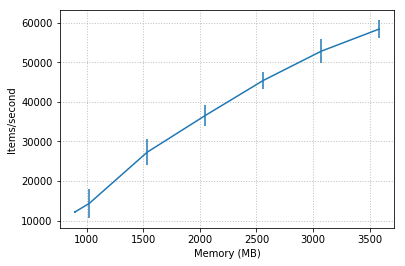

In [110]:
p.plot_memory_profile()

In [111]:
mcd_profile = p.generate_profile()
mcd_profile

MemoryProfile(memcached/l20-g0.90)

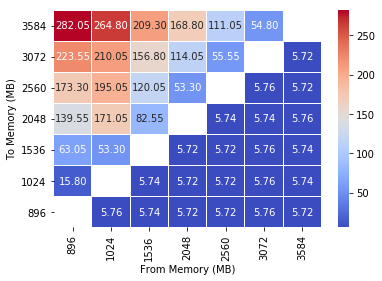

In [112]:
p.plot_t_mem()

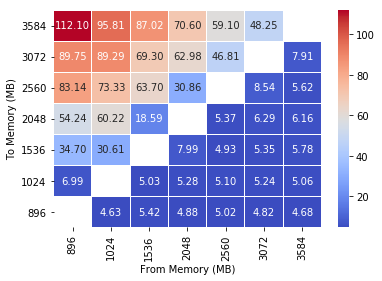

In [113]:
p.plot_e_mem()

/home/fonaro/workspace/wRaaS/elastic-benchmarks/cloudexp/results/exp_analyzer.py:194: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


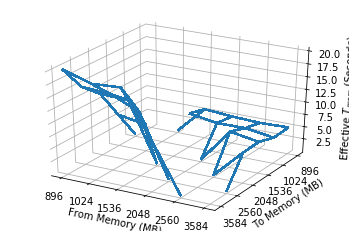

In [40]:
p.plot_e_mem_heat_map('wire')

<IPython.core.display.Javascript object>


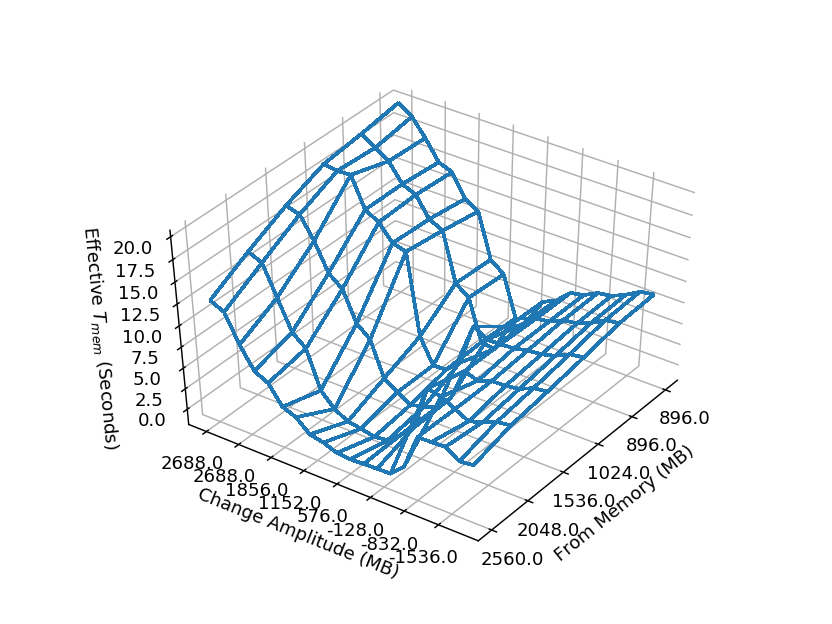

In [61]:
init_plot()
%matplotlib notebook
p.plot_d_e_mem_heat_map('wire')

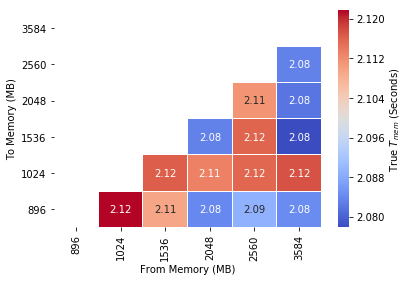

In [31]:
p.plot_t_t_mem_heat_map()

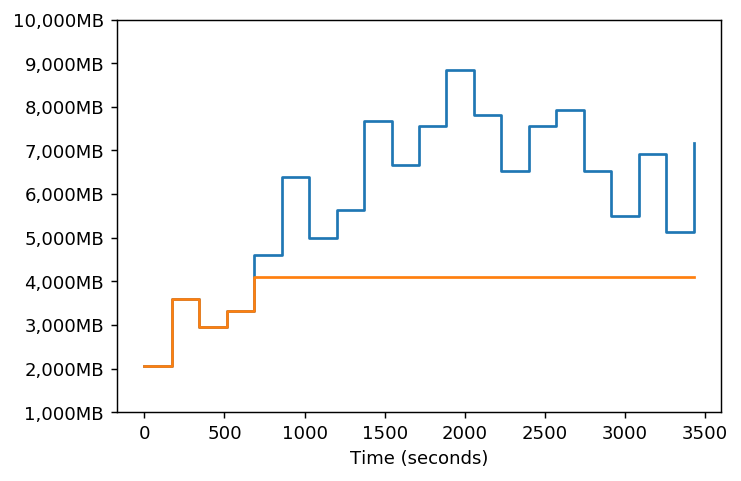

In [5]:
from elasticbench.exp.mem_trace import generate_mem_trace
f = generate_mem_trace(max_amplitude=2048, changes_per_hour=20, density=1)
f += 2048
%matplotlib inline
init_plot()
f.plot()
f.clip(896, 4096, inplace=True)
f.plot()

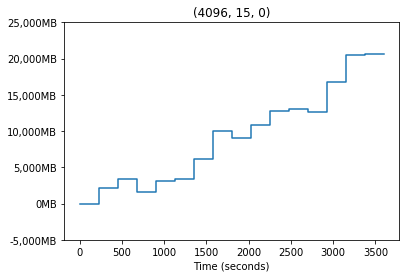

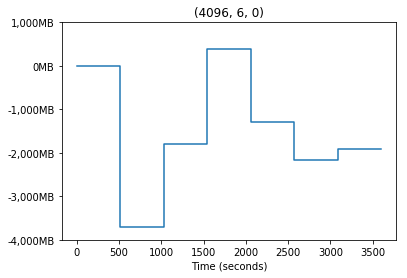

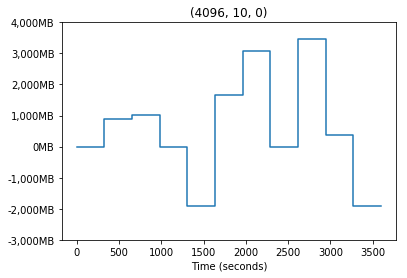

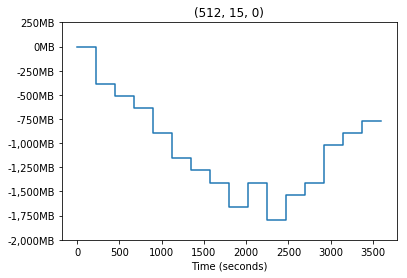

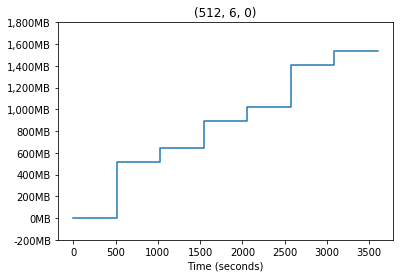

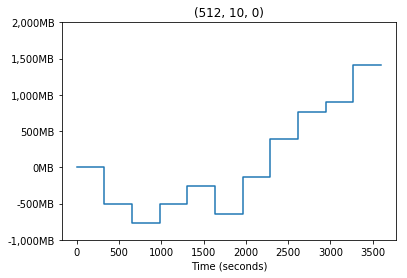

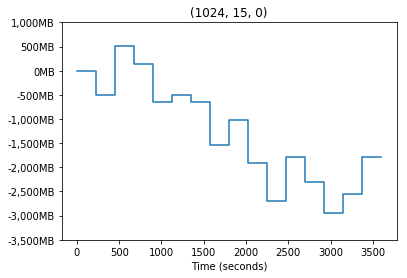

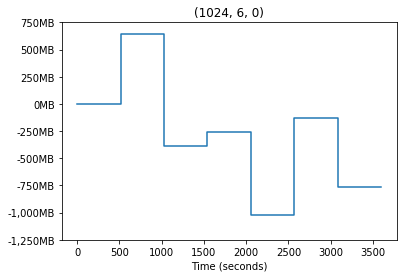

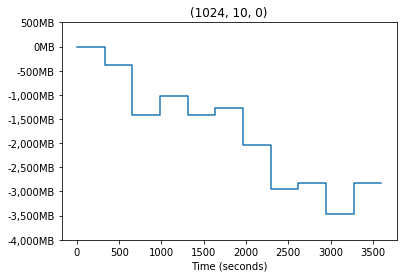

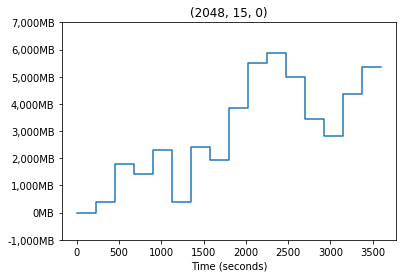

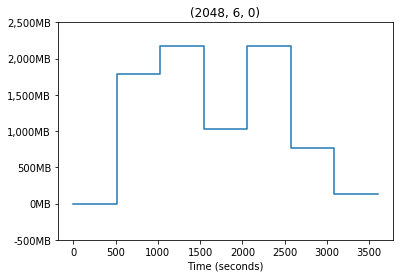

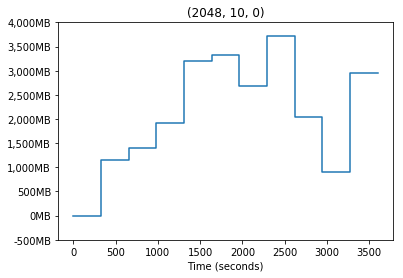

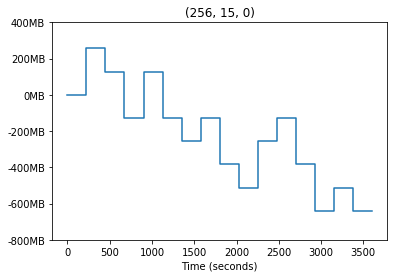

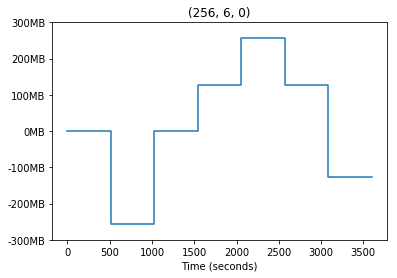

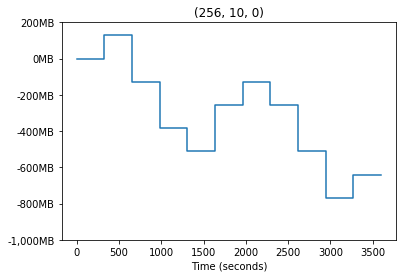

In [3]:
from elasticbench.exp.mem_trace import iterate_over_stored_mem_trace
for k, f in iterate_over_stored_mem_trace():
    f.plot()
    plt.title(k)
    plt.show()

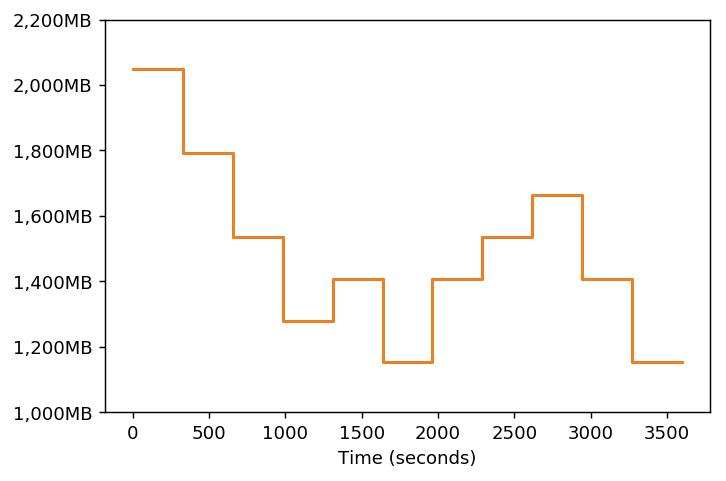

In [16]:
import nesteddict
f = get_stored_mem_trace(256, 10, 0)
f += 2048
%matplotlib inline
init_plot()
f.plot()
f.clip(896, 4096, inplace=True)
f.plot()

In [ ]:
d = ExpData(settings.get_output_path('dec-inc/memcached-l20-m896-6144'))
plot_funcs(d, plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used,
           mcd_plots.perf_hit_rate, mcd_plots.perf_get_throughput, mcd_plots.mem_alloc,
           mcd_plots.mem_max_bytes,
           for_group='vm-1')

In [ ]:
d = ExpData(settings.output_path('drop/memcached/l20-b1024-d896-x5'))
plot_funcs(d, plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used, plots.mem_swap_out,
           #mcd_plots.memaslap_rss, mcd_plots.memaslap_vsize,
           mcd_plots.perf_hit_rate, mcd_plots.perf_get_throughput, mcd_plots.mem_alloc,
           mcd_plots.mem_max_bytes,
           for_group='vm-1')

In [ ]:
d = ExpData(settings.output_path('drop-init/memcached/l20-b1024-d896-x3'))
plot_funcs(d, plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used, plots.mem_swap_out,
           mcd_plots.perf_hit_rate, mcd_plots.perf_get_throughput, mcd_plots.mem_alloc,
           mcd_plots.mem_max_bytes,
           for_group='vm-1')

In [ ]:
d = ExpData(settings.output_path('drop/memcached/l20-b1536-d1024-x5'))
p = ExpAnalyzer(d, mcd_plots, 'vm-1', window_sec=90)
p.plot()

In [ ]:
d = ExpData(settings.output_path('drop/memcached/l20-b2048-d1536-x5'))
p = ExpAnalyzer(d, mcd_plots, 'vm-1', window_sec=60)
p.plot()

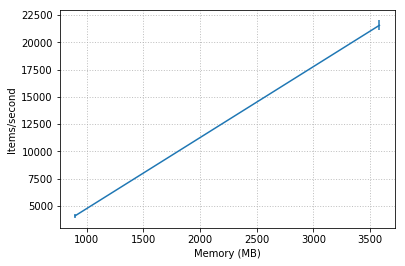

In [22]:
p.plot_memory_profile()

In [ ]:
# from bokeh.themes import built_in_themes
# from bokeh.io import curdoc
# curdoc().theme = 'dark_minimal'
d = ExpData(settings.get_output_path('step/memcached-l20-b4096-s3072-x60'))
plot_funcs(d, plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used,
           mcd_plots.perf_hit_rate, mcd_plots.perf_get_throughput, mcd_plots.mem_alloc,
           mcd_plots.perf_hit_percentage,
           mcd_plots.mem_max_bytes, mcd_plots.perf_ops, #cpu_usage_time, # cpu_usage_percentage
           for_group='vm-1')

In [ ]:
from cloudexp.results.pit_test import PitTest
PitTest(d, mcd_plots.perf_hit_rate, 'vm-1', window_sec=15).plot()

In [ ]:
d = ExpData(settings.get_output_path('static', 'memcached-l10-m4096-1h'))
plot_funcs(d, mem_libvirt, mem_control, mem_available, mem_used,
           mcd_plots.perf_hit_rate, mcd_plots.perf_get_throughput, mcd_plots.mem_alloc,
           mcd_plots.perf_hit_percentage,
           mcd_plots.mem_max_bytes, mem_major_fault, mem_minor_fault, cpu_usage_percentage, #cpu_usage_time, # cpu_usage_percentage
           for_group='vm-1')

In [ ]:
d = ExpData(settings.get_output_path('static', 'iperf-l10-m4096-1h'))
plot_funcs(d, #plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used,
           iperf_plots.perf_bandwidth_resample, #iperf_plots.perf_transfer,
           for_group='vm-1')

In [ ]:
d = ExpData(settings.get_output_path('static', 'stress-l4-m4096-1h'))
plot_funcs(d,
           stress_plots.time_ratio, stress_plots.ops_per_second_real_time, stress_plots.ops_per_second_vm_time,
           plots.cpu_usage_time,
          )

In [ ]:
d = ExpData(settings.get_output_path('static', 'memcached-l1-m4096-3h'))
plot_funcs(d,
           mcd_plots.perf_get_throughput, #mcd_plots.perf_set_throughput,
#            plots.cpu_usage_percentage,
           plots.cpu_usage_time,
#            *[plots.sensor(i, c) for i in range(2) for c in range(6)],
#            *[plots.cpu_freq(i) for i in range(24)],
#            *plots.ksm_parameters()
          )

In [ ]:
x = "full_scans  merge_across_nodes  pages_shared  pages_sharing  pages_to_scan  pages_unshared  pages_volatile  run  sleep_millisecs"
print(x.split())

In [ ]:
from elasticbench.apps.memcached.memslap import MemSlap
from cloudexp.util.logs import start_stdio_logging
from bokeh.models import Range1d
# start_stdio_logging()
m = MemSlap()
x = []
y = []
with open('/home/fonaro/workspace/wRaaS/elasticbench-apps/output-no-ksm.txt', 'r') as f:
    for offset, res in m.iter_parse_lines(f):
        x.append(offset)
        y.append(res['get']['period']['tps(ops/s)'])
fig = new_fig()
print(max(y))
fig.line(x=np.array(x) / 60, y=y)
fig.y_range = Range1d(0, max(y)*1.1)
show(fig)

In [ ]:
keys_dist = [(249, 249, 1.0)]
list(map('{0[0]} {0[1]} {0[2]:.1f}'.format, keys_dist))

In [ ]:
d = ExpData(settings.get_output_path('static', 'memcached-l1-m4096-3h'))
plot_funcs(d, #plots.mem_libvirt, plots.mem_control,
           #mcd_plots.perf_hit_rate,
           mcd_plots.perf_get_throughput,
           #mcd_plots.mem_alloc,
           plots.mem_available, plots.mem_used,
           #mcd_plots.perf_hit_percentage,
           #mcd_plots.mem_max_bytes,
           #plots.cpu_usage_percentage,
           plots.mem_major_fault, plots.mem_minor_fault, 
           plots.cpu_usage_time_resample,# *[plots.cpu_usage_time_i(i) for i in range(4)],
           plots.app_cpu_time('memcached'), plots.app_cpu_time('memaslap'), plots.app_cpu_time('python'),
#            output_filename='vm-perf-drop-puzzle',
          #for_group='vm-1'
          )

In [ ]:
d = ExpData(settings.get_output_path('static', 'memcached-l1-m4096-3h'))
lo_empty_keys = {'carrier', 'colls', 'multicast', 'compressed', 'frame', 'fifo', 'drop', 'errs'}
eth_empty_keys = {'carrier', 'colls', 'compressed', 'frame', 'fifo', 'drop', 'errs'}
plot_funcs(d,
           mcd_plots.perf_get_throughput,
           *[plots.net_stat('lo', d, c) for d, c in plots.NET_KEYS if c not in lo_empty_keys],
           *[plots.net_stat('eth0', d, c) for d, c in plots.NET_KEYS if c not in eth_empty_keys],
          )

In [ ]:
d = ExpData(settings.get_output_path('static', 'memcached-l1-m4096-3h'))
t = mcd_plots.perf_get_throughput(d)
f = [analyze.fetch_data(d, x='sample_start', y=f'memcached:{k}', y_name=k) for k in keys]

In [ ]:
good = ['hash_power_level', 'hash_bytes', 'hash_is_expanding', 'lru_crawler_running', 'lru_crawler_starts', 'crawler_items_checked', 'moves_within_lru']
lru_m = analyze.fetch_data(d, x='sample_start', y=f'memcached:lru_maintainer_juggles', y_name='lru_maintainer_juggles', diff=True)
active_slabs = analyze.fetch_data(d, x='sample_start', y=f'memcached:active_slabs', y_name='active_slabs')
good_f = [f[keys.index(g)] for g in good]
plot(t, *good_f, lru_m, active_slabs, for_group='vm-1')

In [ ]:
d = ExpData(settings.get_output_path('static', 'memcached-l1-m4096-1h'))
plot_funcs(d, plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used,
           mcd_plots.perf_hit_rate, mcd_plots.perf_get_throughput, mcd_plots.mem_alloc,
           mcd_plots.perf_hit_percentage,
           mcd_plots.mem_max_bytes, #plots.cpu_usage_percentage,#cpu_usage_time, # 
           for_group='vm-1')

In [ ]:
d = ExpData(settings.get_output_path('static', 'memcached-l2-m4096-1h'))
plot_funcs(d, plots.mem_libvirt, plots.mem_control, plots.mem_available, plots.mem_used,
           mcd_plots.perf_hit_rate, mcd_plots.perf_get_throughput, mcd_plots.mem_alloc,
           mcd_plots.perf_hit_percentage,
           mcd_plots.mem_max_bytes, #cpu_usage_time, # cpu_usage_percentage
           for_group='vm-1')

In [ ]:
d = ExpData(settings.get_output_path('static', 'memcached-l10-m4096-3h'))
plot_funcs(d, mem_libvirt, mem_control, mem_available, mem_used,
           mcd_plots.perf_hit_rate, mcd_plots.perf_get_throughput, mcd_plots.mem_alloc,
           mcd_plots.perf_hit_percentage,
           mcd_plots.mem_max_bytes, mcd_plots.perf_get_net_rate, mcd_plots.perf_set_net_rate, mcd_plots.perf_total_throughput, #cpu_usage_time, # cpu_usage_percentage
           for_group='vm-1')

In [ ]:
d = ExpData(settings.get_output_path('step/memcached-l10-b4096-s1024-x6'))
df, units = join_multiple_data(d, 'vm-1', mem_used, mem_cache_and_buff,
                               mcd_plots.mem_rss)
# df, units = join_multiple_data(d, 'vm-1', mcd_plots.mem_rss, mcd_plots.mem_alloc)
df, units = join_multiple_data(d, 'vm-1', mem_available, mem_used)
cols = df.columns
df['diff'] = df[cols[0]] - df[cols[1]]# - df[cols[2]]
p = LinePlot()
p.plot_df(df, units=[*units, 'diff'])
p.show()

In [ ]:
sys.version

In [ ]:
from cloudexp.drivers import cpu_settings
cpu_settings.enable_hyper_threading()
cpu_settings.set_cpu_governor('performance')
# cpu_settings.disable_hyper_threading()

# Parse stress-ng

In [ ]:
out = """
stress-ng: info:  [4601] dispatching hogs: 1 cpu
stress-ng: info:  [4601] successful run completed in 3.02s
stress-ng: info:  [4601] stressor       bogo ops real time  usr time  sys time   bogo ops/s   bogo ops/s
stress-ng: info:  [4601]                           (secs)    (secs)    (secs)   (real time) (usr+sys time)
stress-ng: info:  [4601] cpu                 518      3.02      3.01      0.00       171.80       172.09
"""

from elasticbench.apps.stress import parse_stress_ng
parse_stress_ng(out)

# Parse 'sensors'

In [ ]:
out = """
coretemp-isa-0000
Adapter: ISA adapter
Physical id 0:  +56.0°C  (high = +87.0°C, crit = +97.0°C)
Core 0:         +55.0°C  (high = +87.0°C, crit = +97.0°C)
Core 1:         +56.0°C  (high = +87.0°C, crit = +97.0°C)
Core 2:         +54.0°C  (high = +87.0°C, crit = +97.0°C)
Core 3:         +55.0°C  (high = +87.0°C, crit = +97.0°C)
Core 4:         +55.0°C  (high = +87.0°C, crit = +97.0°C)
Core 5:         +53.0°C  (high = +87.0°C, crit = +97.0°C)

coretemp-isa-0001
Adapter: ISA adapter
Physical id 1:  +53.0°C  (high = +87.0°C, crit = +97.0°C)
Core 0:         +50.0°C  (high = +87.0°C, crit = +97.0°C)
Core 1:         +53.0°C  (high = +87.0°C, crit = +97.0°C)
Core 2:         +51.0°C  (high = +87.0°C, crit = +97.0°C)
Core 3:         +52.0°C  (high = +87.0°C, crit = +97.0°C)
Core 4:         +52.0°C  (high = +87.0°C, crit = +97.0°C)
Core 5:         +53.0°C  (high = +87.0°C, crit = +97.0°C)
"""

from mom.monitor.collectors.sensors import parse_sensors
parse_sensors(out)

# Understand win_size

In [ ]:
G = 2**30
k = 2**10

cache_size = 3*G
concurrency = 128
key_size = 128
value_size = 2048 

total_size = key_size + value_size
print("Total size (k):", total_size / k)

# The formula for calculating window size for cache miss rate 0%:
win_size = cache_size / concurrency / (key_size + value_size) * 0.5
print("0% miss rate - win size (k):", win_size / k)

# The formula for calculating window size for cache miss rate 5%:
win_size = cache_size / concurrency / (key_size + value_size) * 0.7
print("5% miss rate - win size (k):", win_size / k)

In [ ]:
# 0.5 = m*0 + c => c=0.5
# 0.7 = m*0.05 + 0.5 => 0.2 = m*0.05 => m=4
m, c = 4, 1/2
f = lambda x: m*x + c
print(f(1-0.125))

# 0.05 = m*0.7 + c
# 0 = m*0.5 + c
# 0.05 = m*0.2 => m=0.25
# 0 = 0.25*0.5 + c => c = -25/2
f2 = lambda x: m*x + c
m, c = 0.25, -0.125
print(f2(4))

In [ ]:
G = 2**30
k = 2**10

cache_size = 3*G
win_size = 1000*k
concurrency = 16
key_size = 512 #249
value_size = 1024

total_size = key_size + value_size
print("Total size (k):", total_size / k)

sz = cache_size / concurrency / total_size
hit_rate = sz / win_size
print("Hit rate:", hit_rate)

# Parse `/proc/net/dev`

In [ ]:
from itertools import cycle, chain
import msgpack, pickle
import zlib

with open("/proc/net/dev", 'r') as f:
    content = f.readlines()

headres = [h.strip().lower() for h in content[0].split('|')]
sub_headres = [h.split() for h in content[1].split('|')]
headres = headres[1:]
sub_headres = sub_headres[1:]
print(headres)
print(sub_headres)

keys = list(chain(*[zip(cycle([h]), s) for h, s in zip(headres, sub_headres)]))
print(keys)

ret = {}
for l in content[2:]:
    l = l.split()
    interface_name = l[0].strip(": ")
    data = l[1:]
    interface = ret.setdefault(interface_name, {})
    for (direction, key), d in zip(keys, data):
        interface.setdefault(direction, {})[key] = int(d)

p1 = pickle.dumps(ret)
p2 = msgpack.dumps(ret, use_bin_type=True)
l1, l2 = map(len, [p1, p2])
c1, c2 = map(lambda o: zlib.compress(o, level=9), [p1, p2])
lc1, lc2 = map(len, [c1, c2])
l1, l2, lc1, lc2

# Parse iperf

In [ ]:
out = """
------------------------------------------------------------
Client connecting to localhost, TCP port 5001
TCP window size: 2.50 MByte (default)
------------------------------------------------------------
[ 12] local 127.0.0.1 port 42018 connected with 127.0.0.1 port 5001
[  3] local 127.0.0.1 port 42000 connected with 127.0.0.1 port 5001
[  6] local 127.0.0.1 port 42002 connected with 127.0.0.1 port 5001
[  7] local 127.0.0.1 port 42006 connected with 127.0.0.1 port 5001
[  4] local 127.0.0.1 port 42004 connected with 127.0.0.1 port 5001
[  8] local 127.0.0.1 port 42008 connected with 127.0.0.1 port 5001
[ 10] local 127.0.0.1 port 42010 connected with 127.0.0.1 port 5001
[  5] local 127.0.0.1 port 42014 connected with 127.0.0.1 port 5001
[  9] local 127.0.0.1 port 42012 connected with 127.0.0.1 port 5001
[ 11] local 127.0.0.1 port 42016 connected with 127.0.0.1 port 5001
[ ID] Interval       Transfer     Bandwidth
[ 12]  0.0- 3.0 sec  5184 MBytes  1728 MBytes/sec
[  3]  0.0- 3.0 sec  2251 MBytes   750 MBytes/sec
[  6]  0.0- 3.0 sec  2683 MBytes   894 MBytes/sec
[  7]  0.0- 3.0 sec  2479 MBytes   826 MBytes/sec
[  4]  0.0- 3.0 sec  2318 MBytes   773 MBytes/sec
[  8]  0.0- 3.0 sec  2068 MBytes   689 MBytes/sec
[ 10]  0.0- 3.0 sec  1959 MBytes   653 MBytes/sec
[  5]  0.0- 3.0 sec  2008 MBytes   669 MBytes/sec
[  9]  0.0- 3.0 sec  2094 MBytes   698 MBytes/sec
[ 11]  0.0- 3.0 sec  2731 MBytes   910 MBytes/sec
[SUM]  0.0- 3.0 sec  25775 MBytes  8589 MBytes/sec
"""

import re
result_pattern = re.compile(r'\s*\[\s*(SUM|\d+)\s*\]\s+[.\d\s-]+\s+[a-z]+\s+([\d.]+)\s+MBytes\s+([\d.]+)\s+MBytes/sec',
                            re.I | re.M)
transfer, bandwidth = 0, 0
match_list = result_pattern.findall(out)
if len(match_list) == 0:
    m = None
elif len(match_list) == 1:
    m = match_list[0][1:]
else:
    match_dict = {k: m for k, *m in match_list}
    m = match_dict['SUM']

if m is not None:
    transfer, bandwidth = map(float, m)

dict(transfer=transfer, bandwidth=bandwidth)

# Intergral Tests

In [ ]:
n = 5
ix = [0, 1, 4, 8, 16]
iy = np.random.uniform(0, 1, size=n-1)
iy = np.cumsum([0, *iy])
iy /= iy.max()
x = np.linspace(0, max(ix), 1024)
y = np.interp(x, ix, iy)

plt.plot(x,y)

In [ ]:
yy = 1-y
plt.plot(x, yy)
print(np.trapz(yy, x))

In [ ]:
ry = np.linspace(0,1,1024)
rx = np.interp(ry, (1-y)[::-1], x[::-1])
# rx = np.gradient(rx ,ry)
# rx = [0, *np.diff(rx) / (ry[1]-ry[0])]
plt.plot(ry, rx)
print(np.trapz(rx, ry))


# Parse memaslap

In [ ]:
test_result_file = '/home/fonaro/workspace/wRaaS/elasticbench-apps/test.txt'
a = b'\x1b[1;1H\x1b[2J'.decode('utf-8')
with open(test_result_file, 'r') as f:
    r = f.read()
#print(r)

In [ ]:
import re
import pprint
from mom.util.parsers import parameter_int_or_float_or_str

MEMSLAP_RESULT_TITLE_PATTERN = re.compile(r'^\s*(Get|Set|Total)\s*Statistics\s*$', re.I | re.M)

def parse_lines(lines):
    ret = {}
    op = None
    headers = None
    for l in lines:
        # First, match an OP (get/set/total) and split to columns.
        op_m = MEMSLAP_RESULT_TITLE_PATTERN.match(l)
        cols = l.split()
        if op_m is not None:
            # If we match an OP, then starting a new table.
            op = op_m.group(1).lower()
            headers = None
        elif op is None:
            # If we did not found an OP and no OP is set, then there is nothing to do.
            pass
        elif headers is None:
            # If headers is not set, then this is an header row.
            headers = [c.lower() for c in cols]
        elif len(cols) == len(headers):
            # If we found an OP and a header row with the same length, then this is its data row.
            d = dict(zip(headers, map(parameter_int_or_float_or_str, cols)))
            t = d.pop('type').lower()
            ret.setdefault(op, {})[t] = d
        else:
            # We have an OP and a header but not data. This means the table has ended.
            op = None
            headers = None

    return ret

s1 = (segment.split('\n') for segment in r.split(a))
s2 = (filter(None, (cur_line.strip() for cur_line in segment_lines))
      for segment_lines in s1)
result = map(parse_lines, s2)
for i, rr in enumerate(result):
    print(i, end=": ")
    pprint.pprint(rr)

In [ ]:
def foo():
    yield from range(3)
        
def bar():
    return foo()
        
f = bar()
from typing import Iterator
print(isinstance(f, Iterator))
if not f:
    print('f')
else:
    for i in f:
        print(i)

In [ ]:
import re
from mom.util.parsers import parameter_int_or_float_or_str
p = re.compile(r'\s*(Get|Set|Total)\s*Statistics\s*', re.I | re.M)

s = filter(None, (p.split(l)[1:] for l in r.split(a)))

for i, ops in enumerate(s):
    p.split()
    op_m = p.match(lines[0])
    if op_m is None:
        continue
    op = op_m.gruop(1).lower()
    
    for i, (op, val) in enumerate(zip(s[1::2], s[2::2])):
        print(i, 'OP:', op)
        print(i, 'VAL:')
        for v in val.strip().split('\n'):
            print(i, v)
    #     v = [l.split() for l in val.strip().split('\n')]
    #     k = v[0]
    #     for l in v[1:]:
    #         print(i, dict(zip(k, map(parameter_int_or_float_or_str, l))))

# Parse memcached STATS

In [ ]:
x = """
STAT pid 1270
STAT uptime 1290
STAT time 1562501438
STAT version 1.5.16
STAT libevent 2.1.8-stable
STAT pointer_size 64
STAT rusage_user 237.004043
STAT rusage_system 496.497734
STAT max_connections 1024
STAT curr_connections 5
STAT total_connections 6
STAT rejected_connections 0
STAT connection_structures 6
STAT reserved_fds 20
STAT cmd_get 5298945
STAT cmd_set 12364204
STAT cmd_flush 0
STAT cmd_touch 0
STAT get_hits 5298945
STAT get_misses 0
STAT get_expired 0
STAT get_flushed 0
STAT delete_misses 0
STAT delete_hits 0
STAT incr_misses 0
STAT incr_hits 0
STAT decr_misses 0
STAT decr_hits 0
STAT cas_misses 0
STAT cas_hits 0
STAT cas_badval 0
STAT touch_hits 0
STAT touch_misses 0
STAT auth_cmds 0
STAT auth_errors 0
STAT bytes_read 17301068741
STAT bytes_written 6962622120
STAT limit_maxbytes 3221225472
STAT accepting_conns 1
STAT listen_disabled_num 0
STAT time_in_listen_disabled_us 0
STAT threads 4
STAT conn_yields 0
STAT hash_power_level 21
STAT hash_bytes 16777216
STAT hash_is_expanding 0
STAT slab_reassign_rescues 0
STAT slab_reassign_chunk_rescues 0
STAT slab_reassign_evictions_nomem 0
STAT slab_reassign_inline_reclaim 0
STAT slab_reassign_busy_items 0
STAT slab_reassign_busy_deletes 0
STAT slab_reassign_running 0
STAT slabs_moved 0
STAT lru_crawler_running 0
STAT lru_crawler_starts 1530
STAT lru_maintainer_juggles 480350
STAT malloc_fails 0
STAT log_worker_dropped 0
STAT log_worker_written 0
STAT log_watcher_skipped 0
STAT log_watcher_sent 0
STAT bytes 2897068032
STAT curr_items 2174976
STAT total_items 12364204
STAT slab_global_page_pool 0
STAT expired_unfetched 0
STAT evicted_unfetched 6785373
STAT evicted_active 0
STAT evictions 10189229
STAT reclaimed 0
STAT crawler_reclaimed 0
STAT crawler_items_checked 9001040
STAT lrutail_reflocked 1
STAT moves_to_cold 11750969
STAT moves_to_warm 836903
STAT moves_within_lru 5851
STAT direct_reclaims 10189228
STAT lru_bumps_dropped 0
END
"""

y="""
STAT 13:chunk_size 1480
STAT 13:chunks_per_page 708
STAT 13:total_pages 3072
STAT 13:total_chunks 2174976
STAT 13:used_chunks 2174976
STAT 13:free_chunks 0
STAT 13:free_chunks_end 0
STAT 13:mem_requested 2897068032
STAT 13:get_hits 8136011
STAT 13:cmd_set 18984024
STAT 13:delete_hits 0
STAT 13:incr_hits 0
STAT 13:decr_hits 0
STAT 13:cas_hits 0
STAT 13:cas_badval 0
STAT 13:touch_hits 0
STAT active_slabs 1
STAT total_malloced 3221225472
END
"""

In [ ]:
import re
from mom.util.parsers import parameter_int_or_float_or_str

e = re.compile(r"\s*STAT\s+([a-z_]+)\s+([\d.]+)", re.I)
data = {m.group(1): parameter_int_or_float_or_str(m.group(2)) for m in e.finditer(x)}
print([k for k, v in data.items() if not isinstance(v, str)])